Name: Vaanishka Trivedi Task: Exploratory Data Analysis on Video Game Sales Dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('C:/Users/trive/Desktop/data analysis/vgsales.csv')

# Introduction
This report provides an analysis of game sales by region, specifically focusing on North America, Europe, Japan. The data reveals interesting insights into the gaming industry's performance across these regions

In [6]:
df.shape

(16598, 11)

# Data Cleaning

checking if columns have any missing values

In [7]:
df.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

checking for any null values

In [11]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [14]:
pd.isnull(df).sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Dropping the null values

In [15]:
df.dropna(inplace=True)

Cross Checking

In [17]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Yearwise Global Sales

In [18]:
df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' , 'Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


<function matplotlib.pyplot.show(close=None, block=None)>

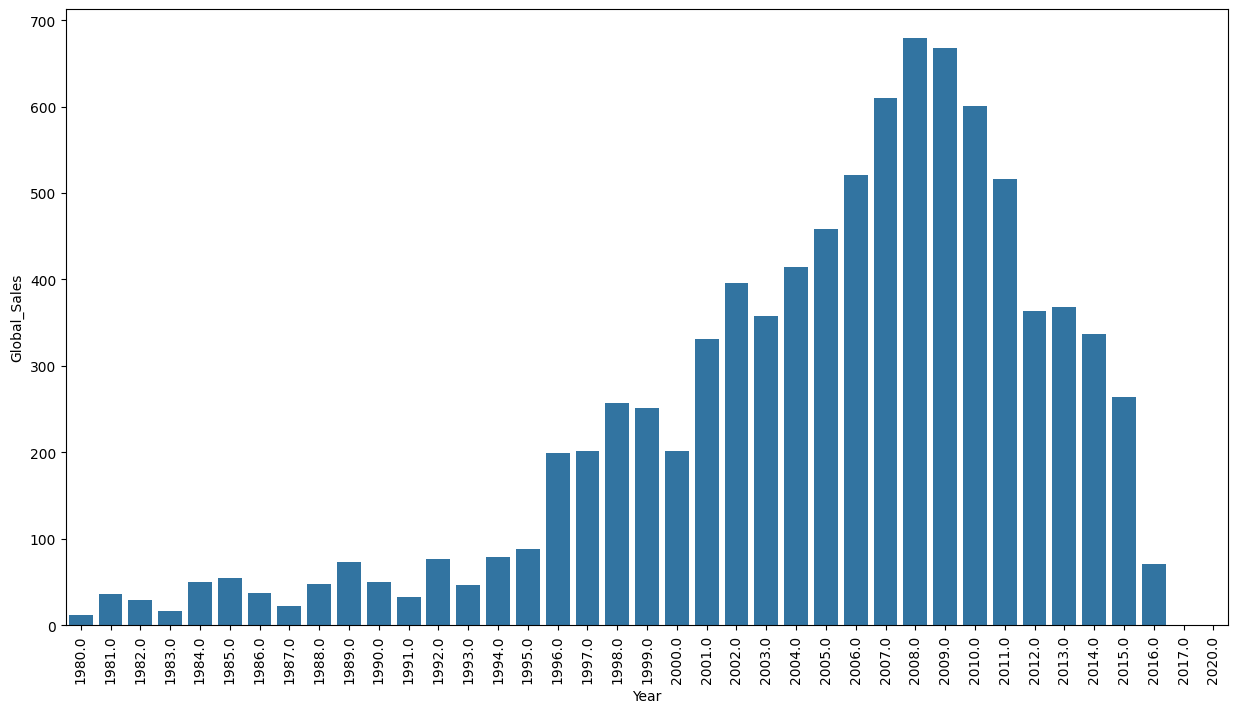

In [19]:
year_sales = df.groupby(by=['Year'])['Global_Sales'].sum()
year_sales = year_sales.reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x="Year", y="Global_Sales", data=year_sales)
plt.xticks(rotation=90)
plt.show

# Exploratory Data Analysis

# Highest Sales Yearwise

<function matplotlib.pyplot.show(close=None, block=None)>

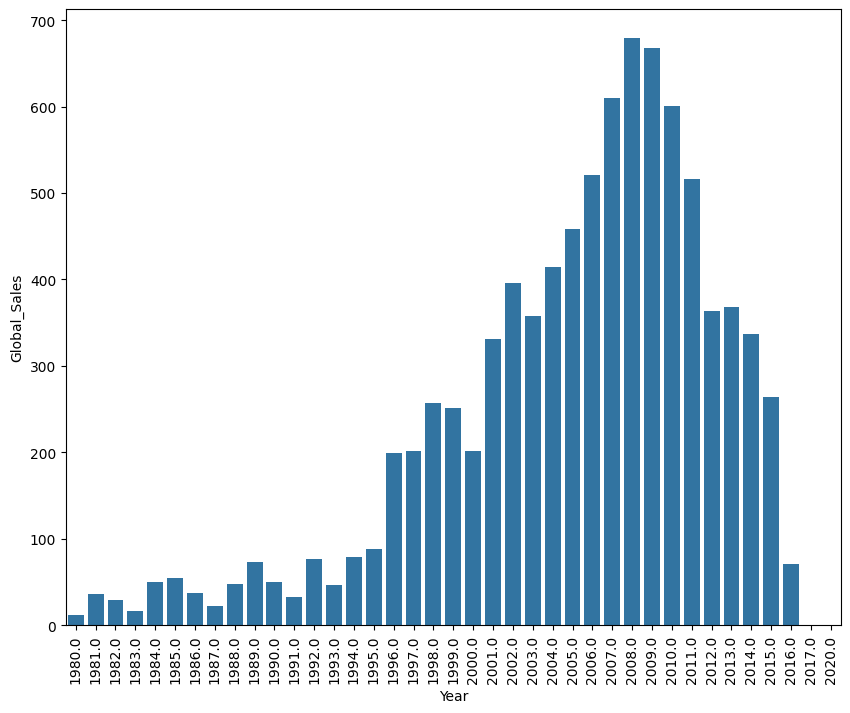

In [20]:

yr_sales = df.groupby(by=['Year'])['Global_Sales'].sum()
yr_sales = yr_sales.reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(x="Year", y="Global_Sales", data=yr_sales)
plt.xticks(rotation=90)
plt.show

Insights:

The bar chart displays that the sales peaked in 2008 with a significant increase froom 2007 and a gradual decline in subsequent years.

The record-breaking sales in 2008 can be attributed to the release of highly successful games such as Grand Theft Auto IV, Wii Fit, and Mario Kart Wii.
The decline in sales after 2008 may be due to the global economic downturn and increased competition from other forms of entertainment.

# Highest Selling Videogames Globally

<function matplotlib.pyplot.show(close=None, block=None)>

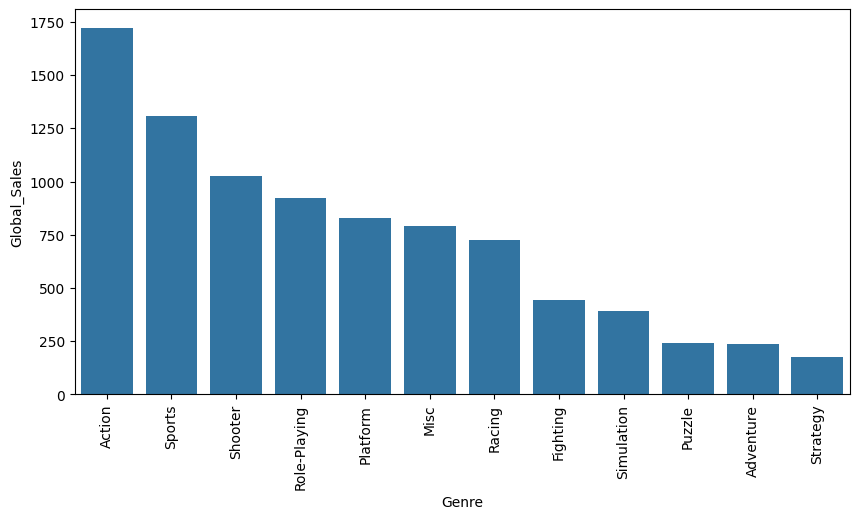

In [21]:

sales_gen = df.groupby(by=['Genre'])['Global_Sales'].sum()
sales_gen = sales_gen.reset_index()
sales_gen = sales_gen.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Genre", y="Global_Sales", data=sales_gen)
plt.xticks(rotation=90)
plt.show

Insights:

The bar graph displays the sales figures for different videogame genres, revealing that Action is thehighest sold genre

# Comparison Of Videogames Sold By Genre In Each Region

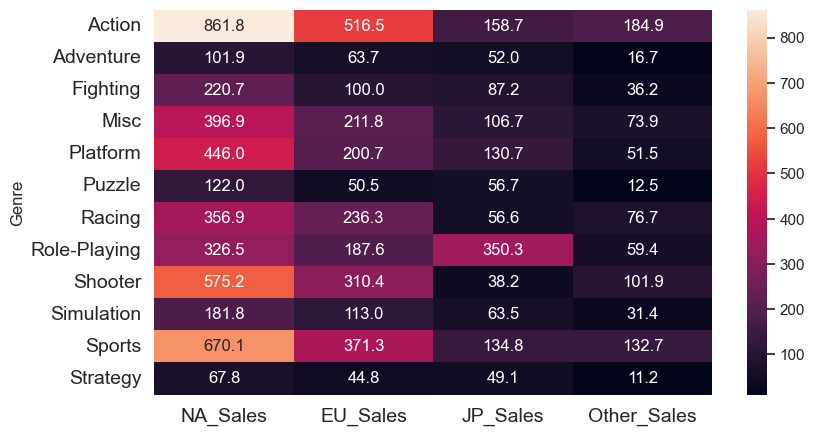

In [23]:

gen_reg = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

reg_map = gen_reg.groupby(by=['Genre']).sum()

plt.figure(figsize=(9,5))
sns.set(font_scale=1)
sns.heatmap(reg_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


Insights:

This heat map illustrates the correlation between sales by genre in different regions, the color intensity represents the magnitude of the data point, with warmer colors indicating higher values and cooler colors indicating lower values.

Bar Chart Insights:

- The Action genre's dominance suggests a strong demand for fast-paced, thrilling experiences.
- The close competition between Adventure and Role-Playing genres indicates a blurred line between exploration and storytelling.
- The relatively low sales of Sports and Strategy games may indicate a niche audience or a need for innovation.

Implications:

- Game developers may prioritize Action genre projects to capitalize on market demand.
- Publishers may focus on marketing campaigns highlighting the unique selling points of Adventure and Role-Playing games.
- The industry may explore ways to revitalize Sports and Strategy games, potentially incorporating new features or gameplay mechanics.

This analysis provides a snapshot of the video game market, highlighting trends and opportunities for growth.

# REGIONAL SALES AND REVENUE

# Sales By Region

In [25]:
rev_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
rev_reg = rev_reg.sum().reset_index()
rev_reg = rev_reg.rename(columns={"index": "region", 0: "sale"})
rev_reg

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


<function matplotlib.pyplot.show(close=None, block=None)>

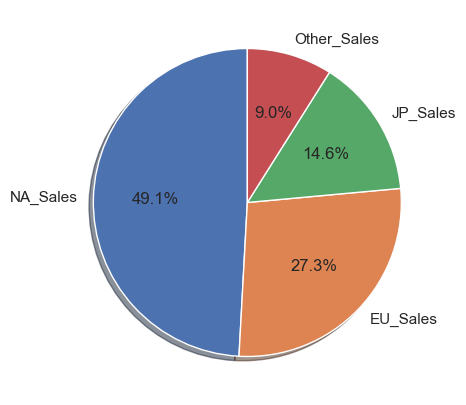

In [26]:
labels = rev_reg['region']
sizes = rev_reg['sale']
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show

The pie chart displays the distribution of video games sales across four regions North America, Europe, Japan and Other Countres.

Insights:

-North America dominates the market: North America accounts for the largest share of sales, indicating a strong gaming culture and a large market.

-Europe is a close second: Europe's sales of 187 units suggest a significant presence in the gaming market, with a strong potential for growth.

-Japan : Japan's relatively lower sales indicate a smaller market share, but still offer opportunities for expansion.

-Regional preferences: The data may suggest regional preferences for specific game genres or platforms, which could inform game development and marketing strategies.

# Sales By Top 20 Publishers

<function matplotlib.pyplot.show(close=None, block=None)>

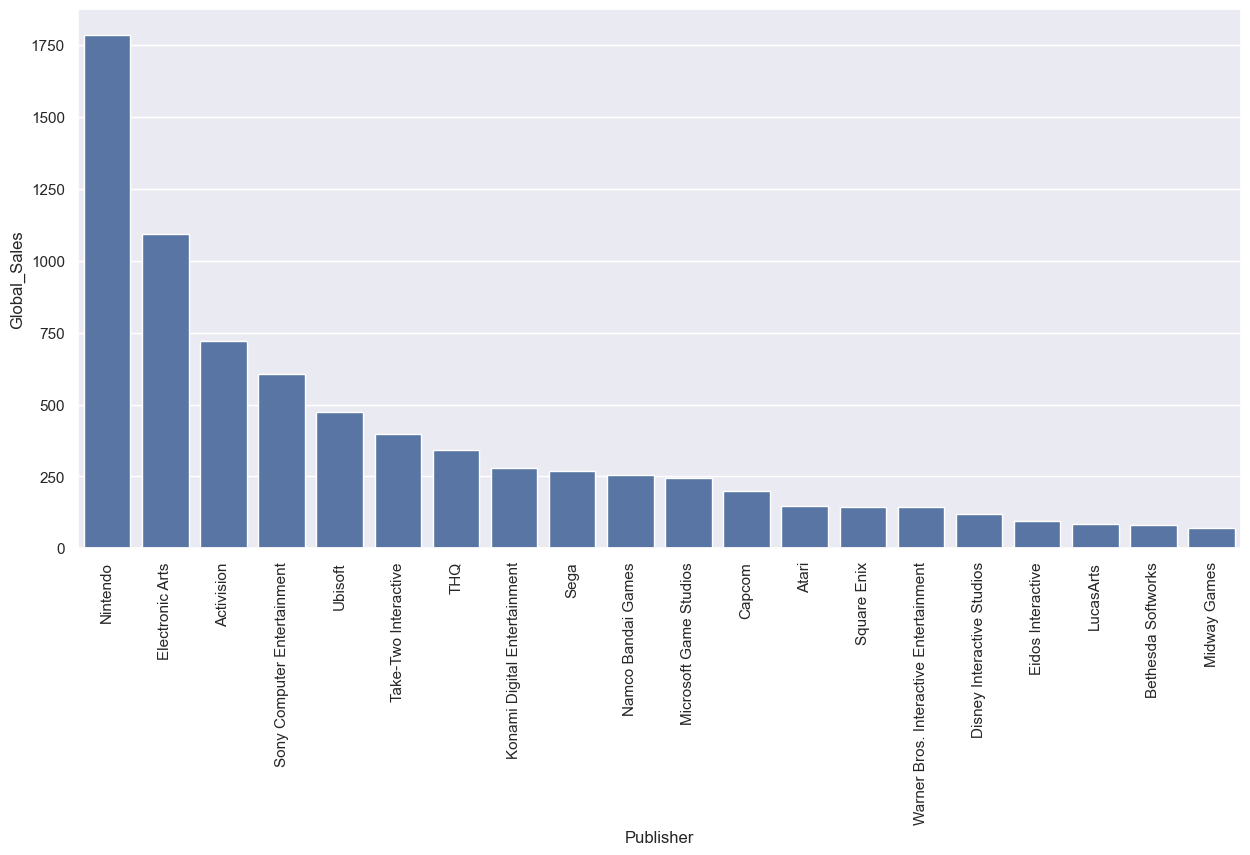

In [27]:
sales_pub = df[['Publisher', 'Global_Sales']]
sales_pub = sales_pub.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sales_pub = pd.DataFrame(sales_pub).reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(x='Publisher', y='Global_Sales', data=sales_pub)
plt.xticks(rotation=90)
plt.show

From the above graph we can infer that nintendo has the highest global sales

Insights:

-The videogame industry is highly concentrated, with a few large publishers dominating the market.

-The success of top publishers is driven by their ability to produce high-quality, engaging games that resonate with gamers.

-Smaller publishers face significant challenges in competing with industry giants, but can still find success by targeting niche markets or developing innovative games.


Implications:

-Industry consolidation: The dominance of a few large publishers may lead to further consolidation, with smaller publishers being acquired or merged.

-Innovation: To compete, smaller publishers must focus on innovation, developing unique games that appeal to specific audiences.

-Market trends: Understanding sales trends by publisher can help identify broader industry trends and opportunities.
